# Importando as bibliotecas em python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import shutil
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator,Locator
from matplotlib import colormaps
import pandas as pd

# Pastas com as entradas e saídas

In [16]:
#INPUT FOLDER (Pasta com as RFs)
INPUT_DIR = '/media/sysop/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/MTZ_2024/PRF_SEISPY_DATA/BP.AR02/'

#OUTPUT FOLDER (Pasta para salvar a figura)
OUTPUT_DIR = '/media/sysop/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/MTZ_2024/OUTPUT/'

# Lendo as Funções do Receptor

In [17]:
RF = glob.glob(INPUT_DIR+'*P_R*')

# Lendo a lista de Funções do Receptor selecionadas pelo SEISPY

In [18]:
RF_select_list = glob.glob(INPUT_DIR+'*finallist.*')[0]

IndexError: list index out of range

In [19]:
table_RF = np.genfromtxt(RF_select_list,delimiter=' P ',dtype='str')

NameError: name 'RF_select_list' is not defined

In [20]:
name_RF_sel = []
for i,j in enumerate(table_RF):
    name_RF_sel.append(j[0])

NameError: name 'table_RF' is not defined

In [21]:
final_RF_sel_lst = [ ]
for i in name_RF_sel:
    final_RF_sel_lst.append([k for k in RF if i in k][0]) 
final_RF_sel_lst = sorted(final_RF_sel_lst)

In [7]:
final_RF_sel_lst = RF

# Empilhando as Funções do Receptor

In [8]:
RF_stack_lst = np.array([op.read(i)[0].data for i in final_RF_sel_lst])
RF_stack = np.sum(RF_stack_lst, axis=0)/len(RF_stack_lst)

# Organizando as Funções do Receptor em função do backazimuth (°)

In [9]:
gcarc_lst = ([op.read(i,headonly=True)[0].stats.sac.baz for i in final_RF_sel_lst])
orglisl = np.argsort(gcarc_lst)

# Criando a figura através do  gridspec:
## Cada nova função do receptor graficada é adicionada um fator (0.05) para plotar todas no mesmo eixo

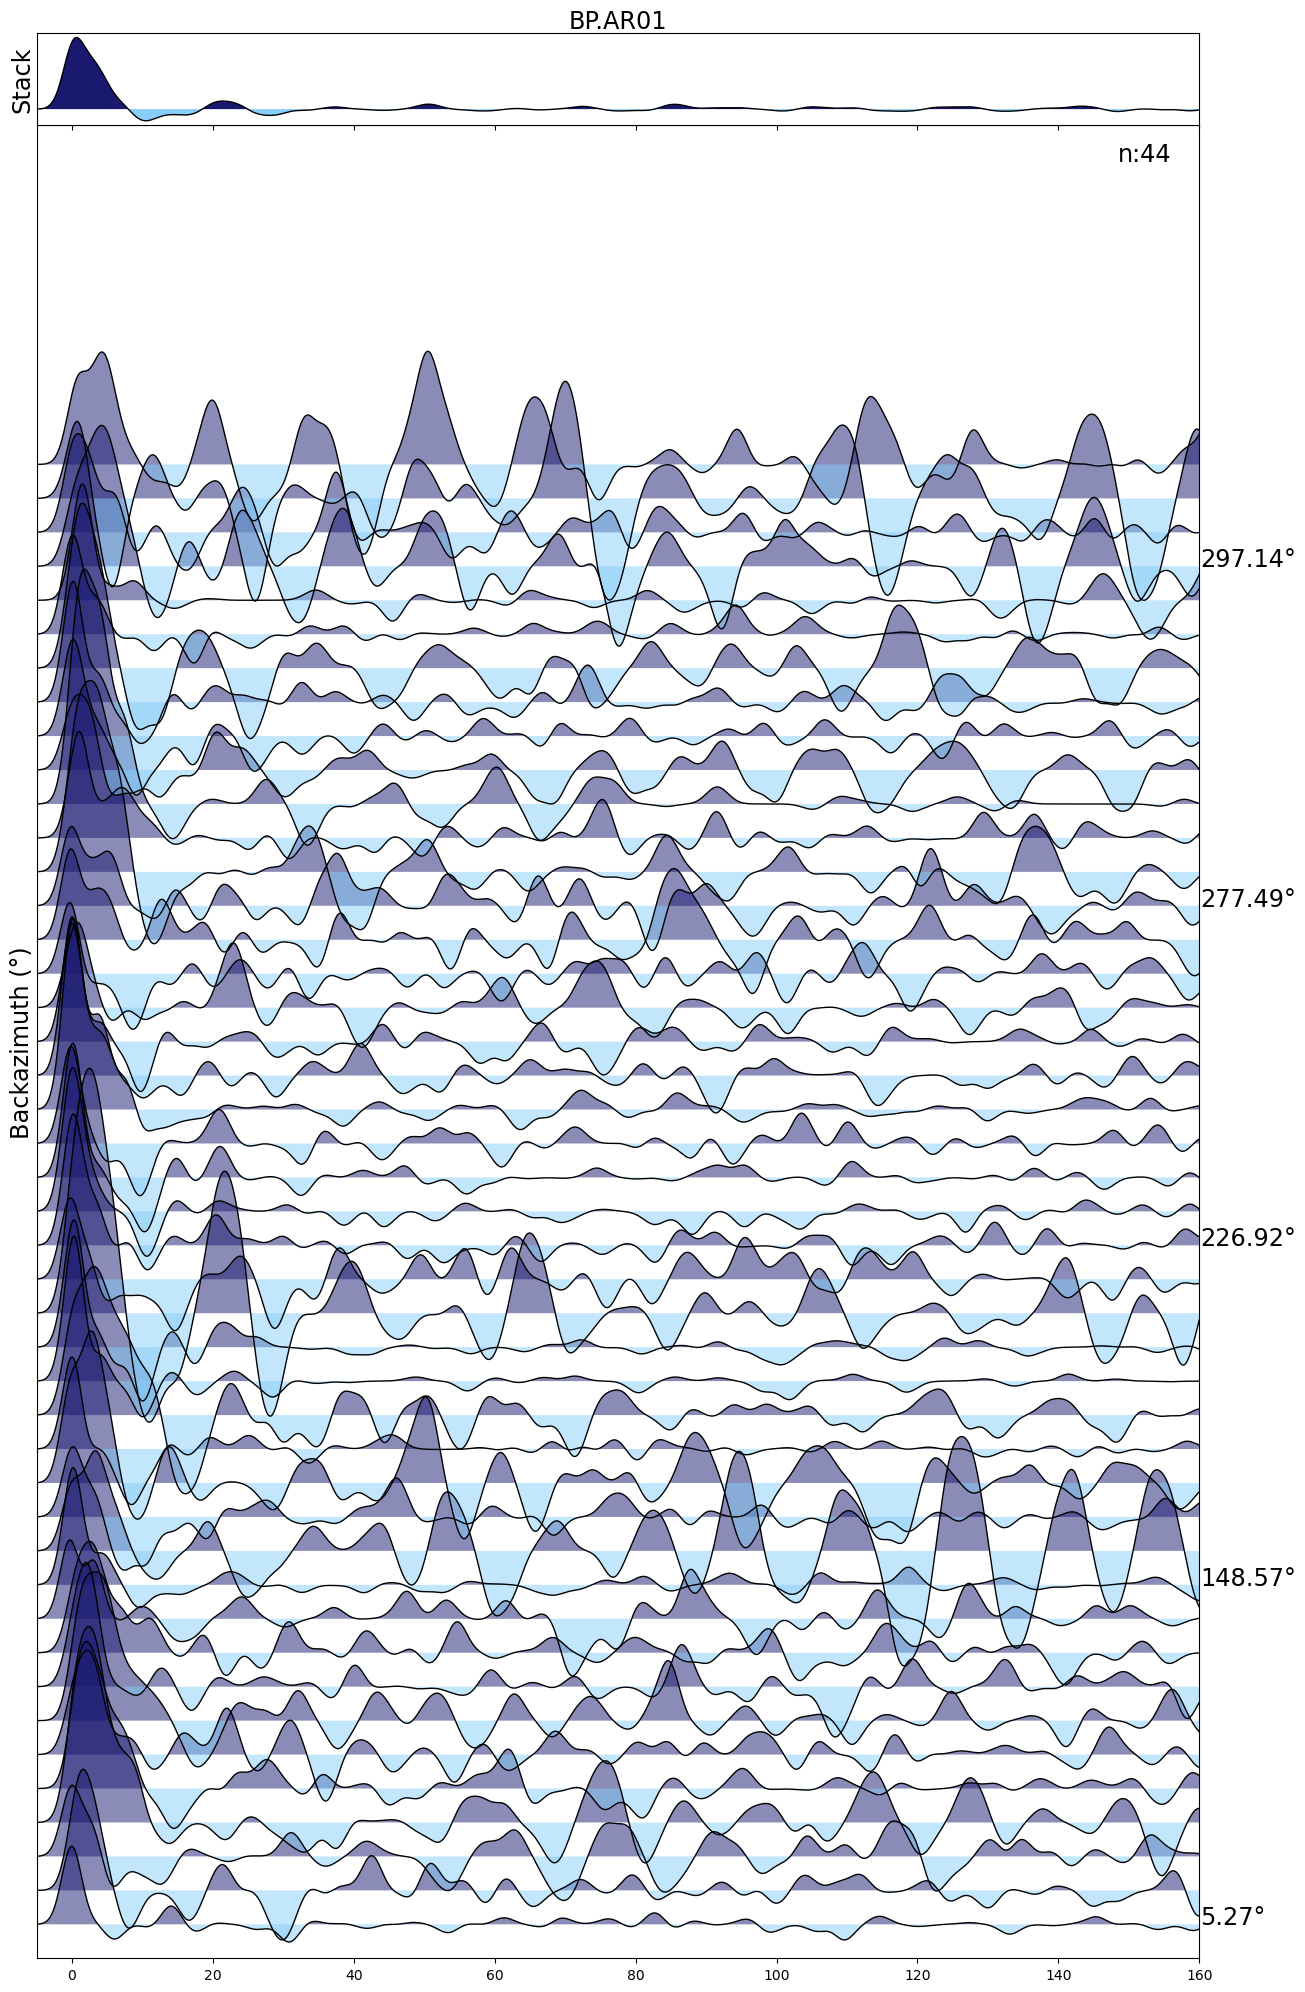

In [15]:
fig = plt.figure(figsize=(15,25),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1,wspace=1,hspace=0,height_ratios=[1,20])


factor = 0

ax1 = fig.add_subplot(gs[1])
for j,i in enumerate(orglisl):
    RF_data = op.read(final_RF_sel_lst[i])[0]
    factor += 0.05

    vetor_normalizado = RF_data.data

    ax1.plot(RF_data.times()-10,factor+vetor_normalizado,'k',linewidth=1)
    ax1.fill_between(RF_data.times()-10,factor+vetor_normalizado,factor,where=(factor+vetor_normalizado)>=factor, facecolor='midnightblue',alpha=0.5, interpolate=True)
    ax1.fill_between(RF_data.times()-10,factor+vetor_normalizado,factor,where=(factor+vetor_normalizado)<=factor, facecolor='lightskyblue',alpha=0.5, interpolate=True)

    var_y = factor+vetor_normalizado[0]

    if j % 10 == 0:
        plt.text(160.1,factor+vetor_normalizado[0],"{0:.2f}".format(RF_data.stats.sac.baz)+'°', fontsize='xx-large')

ax1.set_yticks([])
ax1.set_ylim(0,factor+0.5)
ax1.set_ylabel('Backazimuth (°)',labelpad=2,fontsize='xx-large')
ax1.set_xlim(-5,160)
ax1.text(0.93,0.98, 'n:'+str(len(final_RF_sel_lst)),transform=ax1.transAxes, fontsize='xx-large')

# -------

ax2 = fig.add_subplot(gs[0])

ax2.plot(RF_data.times()-10,RF_stack,'k',linewidth=1)
ax2.fill_between(RF_data.times()-10,RF_stack,0,where=(RF_stack)>=0, facecolor='midnightblue', interpolate=True)
ax2.fill_between(RF_data.times()-10,RF_stack,0,where=(RF_stack)<=0, facecolor='lightskyblue', interpolate=True)

ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_ylabel('Stack',labelpad=2,fontsize='xx-large')
ax2.set_xlim(-5,160)

ax2.set_title(RF_data.stats.network+'.'+RF_data.stats.station, va='center', fontsize='xx-large')

plt.savefig(OUTPUT_DIR+'FIGURES/RF_'+RF_data.stats.network+'_'+RF_data.stats.station+'_ALL_BAZ.png',dpi=300)

In [343]:
RF_all = sorted(glob.glob(INPUT_DIR+'*P*'))

In [344]:
df_RF = pd.DataFrame(RF_all, columns=['RF_name'])

In [345]:
OUTPUT_DIR

'/run/media/dIOGOLOC/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/project_ilhas_oceanicas/OUTPUT/'

In [346]:
print(df_RF_sel['RF_name'].values[0].split('/')[:-1])

['', 'run', 'media', 'dIOGOLOC', '8d2362fc-3b46-49a7-a864-19b2a6ad097b', 'diogoloc', 'dados_posdoc', 'project_ilhas_oceanicas', 'OUTPUT', 'RF_SELECT_STATION_EVENT', '2.0', 'ON.ABR01']


Text(0.5, 0.98, 'ON.TRI01')

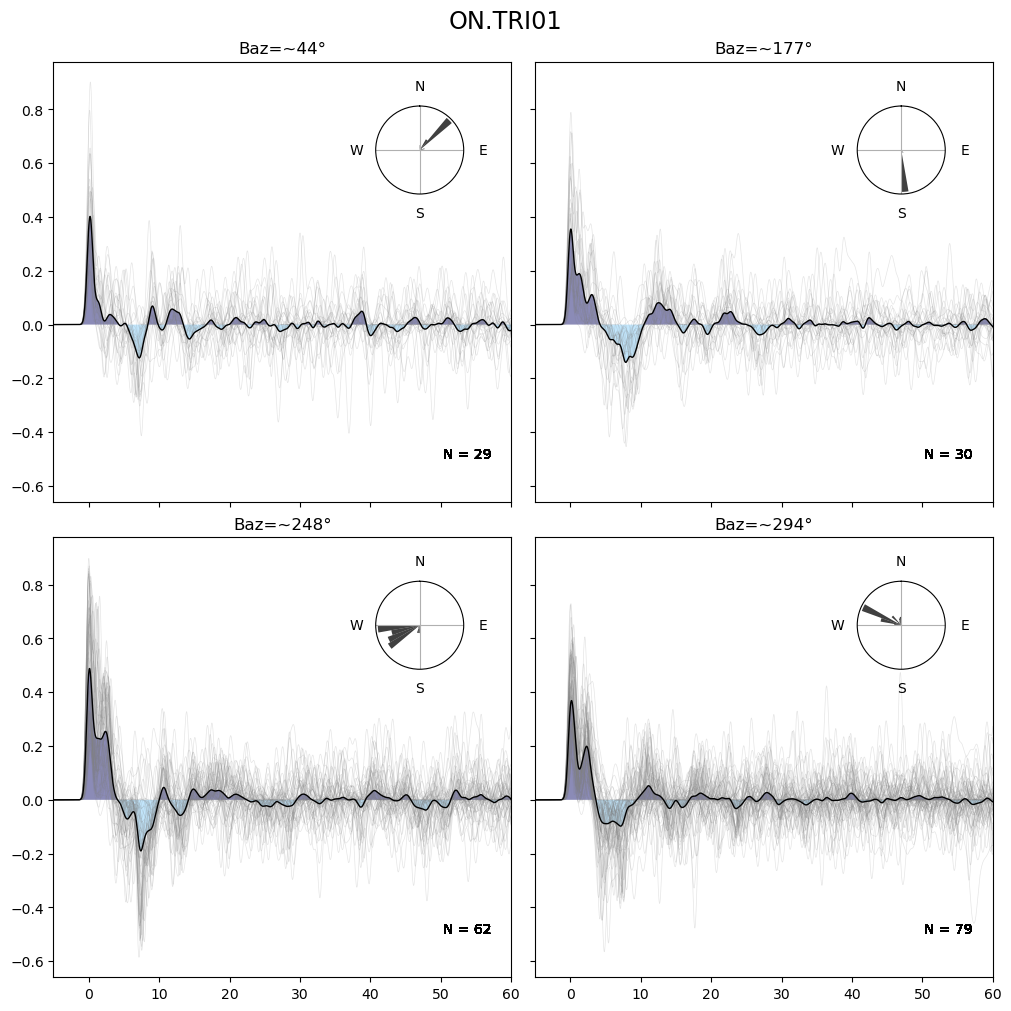

In [347]:
df_lst = []
for i in sorted(name_RF_sel):
    df_RF_sel = df_RF[df_RF['RF_name'].str.contains(i)]

    data_RF = op.read(df_RF_sel['RF_name'].values[0])
    data_RF_T = op.read(df_RF_sel['RF_name'].values[1])


    df = pd.DataFrame([
                        [df_RF_sel['RF_name'].values[0]],
                        [df_RF_sel['RF_name'].values[1]],
                        [data_RF[0].data.tolist()],
                        [(data_RF[0].times()-10).tolist()],
                        [data_RF_T[0].data.tolist()],
                        [float(data_RF[0].stats.sac.npts)],
                        [data_RF[0].stats.network],
                        [data_RF[0].stats.station],
                        [float(data_RF[0].stats.sac.nzyear)],
                        [float(data_RF[0].stats.sac.nzjday)],
                        [float(data_RF[0].stats.sac.nzhour)],
                        [float(data_RF[0].stats.sac.nzmin)],
                        [float(data_RF[0].stats.sac.nzmsec)],
                        [float(data_RF[0].stats.sac.evla)],
                        [float(data_RF[0].stats.sac.evlo)],
                        [float(data_RF[0].stats.sac.evdp)],
                        [float(data_RF[0].stats.sac.mag)],
                        [float(data_RF[0].stats.sac.stla)],
                        [float(data_RF[0].stats.sac.stlo)],
                        [float(data_RF[0].stats.sac.internal0)],
                        [float(data_RF[0].stats.sac.dist)],
                        [float(data_RF[0].stats.sac.az)],
                        [float(data_RF[0].stats.sac.baz)],
                        [float(data_RF[0].stats.sac.gcarc)],
                        [float(data_RF[0].stats.sac.b)],
                        [float(data_RF[0].stats.sac.e)],
                        [True]
                    ], 
                        index=['dataRfilename','dataTfilename','dataR','dataR_time','dataT','npts',
                               'network','station','nzyear','nzjday','nzhour','nzmin','nzmsec',
                               'evla','evlo','evdp','mag','stla','stlo',
                               'internal0','dist','az','baz','gcarc','b','e','selection']).T
    df_lst.append(df)

RF_data_df = pd.concat(df_lst)

# Especifique o número desejado de grupos (quadrantes)
num_grupos = 4

# Use pd.cut para dividir as linhas em grupos com base na coluna 'azimute'
RF_data_df['grupo'] = pd.cut(RF_data_df['baz'], bins=num_grupos, labels=[i for i in range(num_grupos)])
    
fig, axs = plt.subplots(2,2,figsize=(10,10), layout='constrained',sharey=True,sharex=True)

for g,ax in enumerate(axs.flat):
        RF_data_df_grupo = RF_data_df[RF_data_df['grupo'] == g]

        # ----------------------------------
        # Axis
        RF_directory = OUTPUT_DIR+'/HK_stacking/'+data_RF[0].stats.network+'.'+data_RF[0].stats.station+'/'+'grupo_'+str(g)+'/'
        os.makedirs(RF_directory,exist_ok=True)

        RF_stack_data = RF_data_df_grupo['dataR'].apply(np.array).mean(axis=0)
        RF_stack_data_time = RF_data_df_grupo['dataR_time'].apply(np.array).mean(axis=0)

        for i, row in RF_data_df_grupo.iterrows():
            shutil.copy2(row['dataRfilename'],RF_directory+row['dataRfilename'].split('/')[-1])
            shutil.copy2(row['dataTfilename'],RF_directory+row['dataTfilename'].split('/')[-1])

            ax.plot(row['dataR_time'],row['dataR'],'gray',linewidth=0.5,label='RF data',alpha=0.2)
            ax.text(0.85,0.1,'N = '+str(len(RF_data_df_grupo)),transform=ax.transAxes,fontsize='medium')
            ax.set_title('Baz=~'+str(round(RF_data_df_grupo['baz'].median()))+'°')
            ax.set_xlim(-5,60)
        ax.plot(RF_stack_data_time,RF_stack_data,'k',linewidth=1,label='RF stack')
        ax.fill_between(RF_stack_data_time,RF_stack_data,0,where=(RF_stack_data)>=0, facecolor='midnightblue',alpha=0.5, interpolate=True)
        ax.fill_between(RF_stack_data_time,RF_stack_data,0,where=(RF_stack_data)<=0, facecolor='lightskyblue',alpha=0.5, interpolate=True)

        # ----------------------------------
        # Axis
        # Criação do inset polar
        inset_ax  = ax.inset_axes([0.7, 0.7, 0.2, 0.2],xticklabels=[], yticklabels=[],polar=True)
    
        # Converta os azimutes de graus para radianos
        azimutes_radianos = np.array([np.deg2rad(i) for i in RF_data_df_grupo['baz'].values])

        # Crie um histograma polar
        inset_ax.hist(azimutes_radianos, bins=36, range=(0, 2 * np.pi), align='mid', color='k',alpha=0.75)

        # Configure os rótulos das direções
        directions = ['N','E','S','W']
        angles = np.deg2rad([0, 90,180, 270])
        inset_ax.set_xticks(angles)
        inset_ax.set_xticklabels(directions)
        inset_ax.set_yticklabels([])
        inset_ax.set_yticks([])
        
        # Plotagem da direção do vento no subplot
        inset_ax.set_theta_direction(-1)  # Inverte a direção para que 0 graus seja o Norte
        inset_ax.set_theta_offset(np.deg2rad(90))  # Rotação em -90 graus para que 0 graus seja o Norte
        inset_ax.set_rlabel_position(90)  # Posição dos rótulos radiais
fig.suptitle(data_RF[0].stats.network+'.'+data_RF[0].stats.station, fontsize='xx-large')